In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('owid-covid-data.xlsx', usecols='C:E')
df.rename(columns={'location':'국가','date':'일자', 'total_cases':'확진자'}, inplace=True)
df = df.fillna(0)
df['일자'] = pd.to_datetime(df['일자'])
df['일자'] = df['일자'].dt.strftime('%y.%m.%d')
df = df[df['일자'] == '22.10.28']
df['확진자'] = df['확진자'].astype(int)
df

,국가,일자,확진자
977,Afghanistan,22.10.28,202756
1966,Africa,22.10.28,12382583
2943,Albania,22.10.28,332911
3920,Algeria,22.10.28,270826
4891,Andorra,22.10.28,46535
...,...,...,...
227087,Wallis and Futuna,22.10.28,761
228099,World,22.10.28,629786726
229031,Yemen,22.10.28,11939
229986,Zambia,22.10.28,333674


In [3]:
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'High income', 'Upper middle income', 'Low income', 
              'Lower middle income', 'North America', 'South Africa', 'South America', 'World']
filt = df['국가'].isin(continents)
df = df[~filt]
df

,국가,일자,확진자
977,Afghanistan,22.10.28,202756
2943,Albania,22.10.28,332911
3920,Algeria,22.10.28,270826
4891,Andorra,22.10.28,46535
5844,Angola,22.10.28,103131
...,...,...,...
225400,Vietnam,22.10.28,11501906
227087,Wallis and Futuna,22.10.28,761
229031,Yemen,22.10.28,11939
229986,Zambia,22.10.28,333674


In [4]:
df = df.sort_values(by=['확진자'], ascending=0)
df_top = df.head(10)
df_top

,국가,일자,확진자
217999,United States,22.10.28,97438900
95100,India,22.10.28,44650662
73330,France,22.10.28,36832762
78187,Germany,22.10.28,35571130
29152,Brazil,22.10.28,34815258
193446,South Korea,22.10.28,25504288
216988,United Kingdom,22.10.28,23898489
102937,Italy,22.10.28,23504224
104910,Japan,22.10.28,22217117
171314,Russia,22.10.28,21105179


In [5]:
df_etc = df.iloc[10:]
df_etc

,국가,일자,확진자
211010,Turkey,22.10.28,16919638
195384,Spain,22.10.28,13511768
156932,Oceania,22.10.28,12595582
225400,Vietnam,22.10.28,11501906
12758,Australia,22.10.28,10375475
...,...,...,...
227087,Wallis and Futuna,22.10.28,761
97066,International,22.10.28,721
223431,Vatican,22.10.28,29
213059,Tuvalu,22.10.28,23


In [6]:
df_top.set_index('국가', inplace=True)

In [7]:
df_top.loc['ETC'] = ['22.10.28', df_etc['확진자'].sum()]

C:\Users\user\AppData\Local\Temp\ipykernel_14488\1514676988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.loc['ETC'] = ['22.10.28', df_etc['확진자'].sum()]


In [8]:
df_top

,일자,확진자
국가,,
United States,22.10.28,97438900
India,22.10.28,44650662
France,22.10.28,36832762
Germany,22.10.28,35571130
Brazil,22.10.28,34815258
South Korea,22.10.28,25504288
United Kingdom,22.10.28,23898489
Italy,22.10.28,23504224
Japan,22.10.28,22217117


In [9]:
df_top.reset_index(inplace=True)
df_top

,국가,일자,확진자
0,United States,22.10.28,97438900
1,India,22.10.28,44650662
2,France,22.10.28,36832762
3,Germany,22.10.28,35571130
4,Brazil,22.10.28,34815258
5,South Korea,22.10.28,25504288
6,United Kingdom,22.10.28,23898489
7,Italy,22.10.28,23504224
8,Japan,22.10.28,22217117
9,Russia,22.10.28,21105179


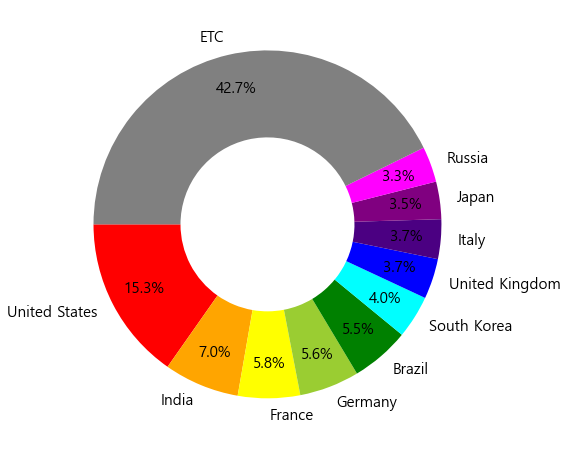

In [10]:
fig = plt.figure(figsize=(8,8))
values = df_top['확진자'].tolist()
labels = df_top['국가'].tolist()
colors = ['#ff0000', '#ffa500', '#ffff00', '#9acd32', '#008000',
          '#00ffff', '#0000ff', '#4b0082', '#800080', '#ff00ff', '#808080']
plt.pie(values, labels=labels, wedgeprops=dict(width=0.5),
        autopct = '%.1f%%', startangle=180, colors=colors, pctdistance = 0.8)
plt.show()